In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
import seaborn as sns
from PyEMD import EMD, EEMD, CEEMDAN

%matplotlib inline
plt.rc('font',family='Arial') 
plt.style.use("ggplot")
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'
font_T = fm.FontProperties(family='Arial', size=24, stretch=0, weight='bold')
font_T_small = fm.FontProperties(family='Arial', size=15, stretch=0)
font_T_mini = fm.FontProperties(family='Arial', size=12, stretch=0)


# 导入数据

In [20]:
# 载入时间序列数据
data = pd.read_csv('Amazon16-21.csv', usecols=[1])
S = data.values[:, 0]
t = np.arange(0, len(S), 1)  # 横轴的取值范围

# EMD分解

In [21]:
# 获得分量+残余分量
emd = EMD()
emd.emd(S)
IMFs, res = emd.get_imfs_and_residue()
nIMFs = IMFs.shape[0]+1  # 子序列的个数

# 保存分解结果
IMFs_df = pd.DataFrame(IMFs.T, columns=['imf'+str(i+1) for i in range(nIMFs-1)])
res_df = pd.DataFrame(data=res, columns=['res'])
emd_df = pd.concat([IMFs_df, res_df], axis=1)
emd_df.to_csv('EMD_result.csv', index=False)
emd_df

,imf1,imf2,imf3,imf4,imf5,imf6,imf7,res
0,8.891274,1.782022,24.523783,38.524192,30.086251,-53.002230,-141.789812,748.704491
1,2.353553,-4.637073,26.211718,39.135302,30.205169,-53.278508,-141.957953,748.877765
2,0.527124,-8.430064,24.493711,39.594222,30.189939,-53.515848,-142.123561,749.054455
3,-3.887865,-9.563286,20.304827,39.875208,30.037117,-53.713930,-142.286629,749.234559
4,-5.231304,-7.870945,14.454003,39.942971,29.747219,-53.872856,-142.447151,749.418077
...,...,...,...,...,...,...,...,...
1505,-24.875342,28.930103,16.879524,-115.203247,103.684685,7.736200,238.102444,3184.245633
1506,-8.695431,28.531488,20.281532,-114.491076,103.388685,8.609212,236.579358,3184.656338
1507,7.762061,-0.939047,16.686782,-112.674745,103.060650,9.522175,235.042196,3185.059948
1508,23.475573,-29.511148,7.945234,-109.791627,102.699822,10.474825,233.490860,3185.456450


## 画图

C:\Users\Cooper\AppData\Local\Temp\ipykernel_26580\3014792378.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nIMFs, 1, n + 1)
C:\Users\Cooper\AppData\Local\Temp\ipykernel_26580\3014792378.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=IMFs[n], linewidth=1, palette=sns.color_palette("Paired")[1])
C:\Users\Cooper\AppData\Local\Temp\ipykernel_26580\3014792378.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=IMFs[n], linewidth=1, palette=sns.color_palette("Paired")[1])
C:\Users\Cooper\AppData\Local\Temp\ipykernel_26580\3014792378.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=IMFs[n], linewidth=1, palette=sns.color_palette("Paired")[1])
C:\Users\Cooper\AppData\Local\Temp\ipykernel_

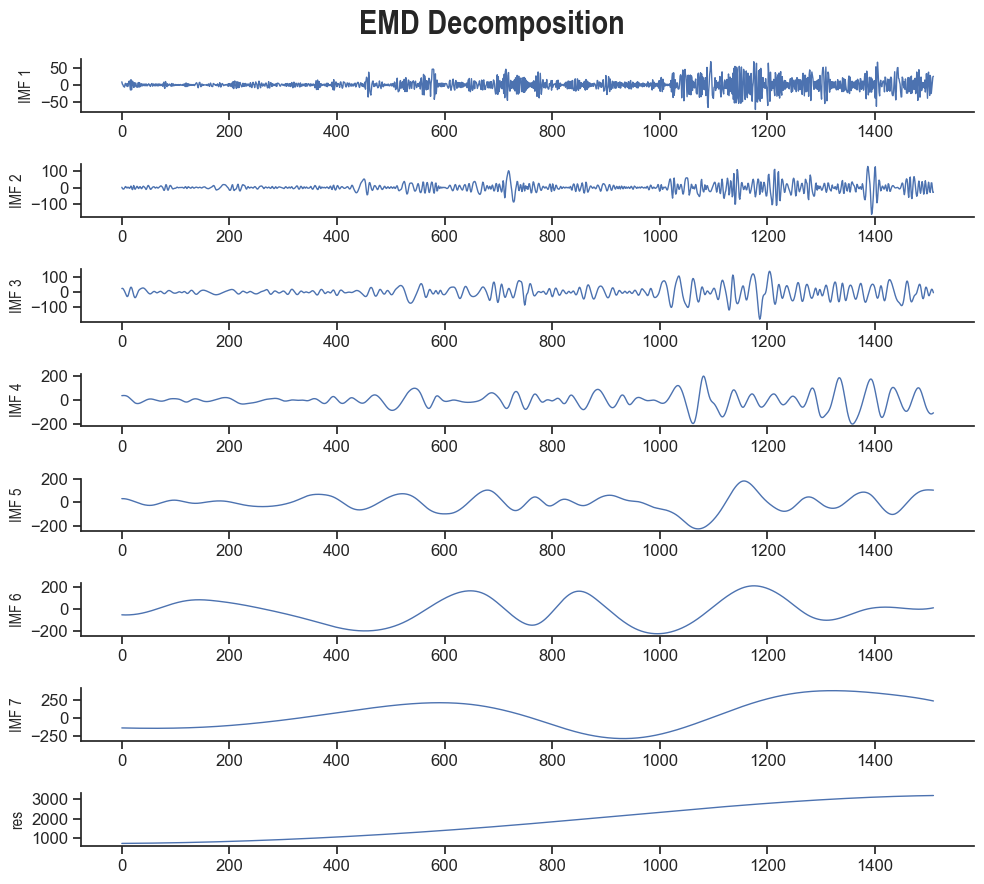

In [22]:
sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(10, 9))
# 设置刻度
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

#IMF的图像
for n in range(nIMFs):
    plt.subplot(nIMFs, 1, n + 1)
    if n != nIMFs-1:
        sns.lineplot(data=IMFs[n], linewidth=1, palette=sns.color_palette("Paired")[1])
        plt.ylabel("IMF %i" % (n + 1), fontproperties = font_T_mini)
    else:
        sns.lineplot(data=res, linewidth=1, palette=sns.color_palette("Paired")[1])
        plt.ylabel("res", fontproperties = font_T_mini)
    sns.despine()
    plt.locator_params(axis="y", nbins=3) #调整坐标轴刻度
    plt.xticks(fontproperties = {'family':'Arial'})
    plt.yticks(fontproperties = {'family':'Arial'})
    plt.tight_layout()
plt.suptitle('EMD Decomposition', fontproperties = font_T)
plt.tight_layout()
plt.savefig('EMD_result.png', dpi=300, bbox_inches='tight')

# EEMD分解

In [23]:

# decompose
if __name__ == "__main__":   # don't skip the if __name__ == "__main__" section
    eemd = EEMD(trials=100, noise_width=0.2)  # 加入100组标准差为0.2的白噪音
    eIMFs = eemd.eemd(S, t)  # eemd分解
    nIMFs = eIMFs.shape[0]  # 子序列的个数

# 保存分解结果
eIMFs_df = pd.DataFrame(eIMFs.T, columns=['imf'+str(i+1) for i in range(nIMFs)])
eIMFs_df.to_csv('EEMD_result.csv', index=False)
eIMFs_df

,imf1,imf2,imf3,imf4,imf5,imf6,imf7,imf8,imf9
0,-41.876391,-53.976166,21.652832,29.121091,22.486452,-40.281192,-23.252310,353.512274,720.567409
1,14.846978,-39.282495,22.753160,30.452988,23.635755,-40.431125,-23.376931,353.335454,720.614677
2,38.812431,1.512500,22.508844,30.608403,24.635041,-40.585931,-23.483886,353.163537,720.666063
3,8.352998,8.208565,23.995615,29.519318,25.473453,-40.745589,-23.572935,352.996529,720.721566
4,113.528329,-34.939325,27.626242,27.227307,26.142216,-40.909356,-23.643869,352.834439,720.781186
...,...,...,...,...,...,...,...,...,...
1505,-49.730799,-32.173784,6.397359,-49.947459,-7.915272,29.836288,38.475777,2202.171757,3164.578238
1506,10.766688,-10.168569,25.476380,-42.038218,-9.368600,29.286985,38.831592,2201.493099,3164.803512
1507,-11.010623,12.564384,38.731252,-33.745052,-10.210180,28.705089,39.192467,2200.806656,3165.021275
1508,-60.387663,17.681691,41.466391,-25.652904,-10.429346,28.095727,39.558357,2200.112451,3165.231519


## 画图

C:\Users\Cooper\AppData\Local\Temp\ipykernel_26580\2942268226.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nIMFs, 1, n + 1)
C:\Users\Cooper\AppData\Local\Temp\ipykernel_26580\2942268226.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=eIMFs[n], linewidth=1, palette=sns.color_palette("Paired")[1])
C:\Users\Cooper\AppData\Local\Temp\ipykernel_26580\2942268226.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=eIMFs[n], linewidth=1, palette=sns.color_palette("Paired")[1])
C:\Users\Cooper\AppData\Local\Temp\ipykernel_26580\2942268226.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=eIMFs[n], linewidth=1, palette=sns.color_palette("Paired")[1])
C:\Users\Cooper\AppData\Local\Temp\ipykern

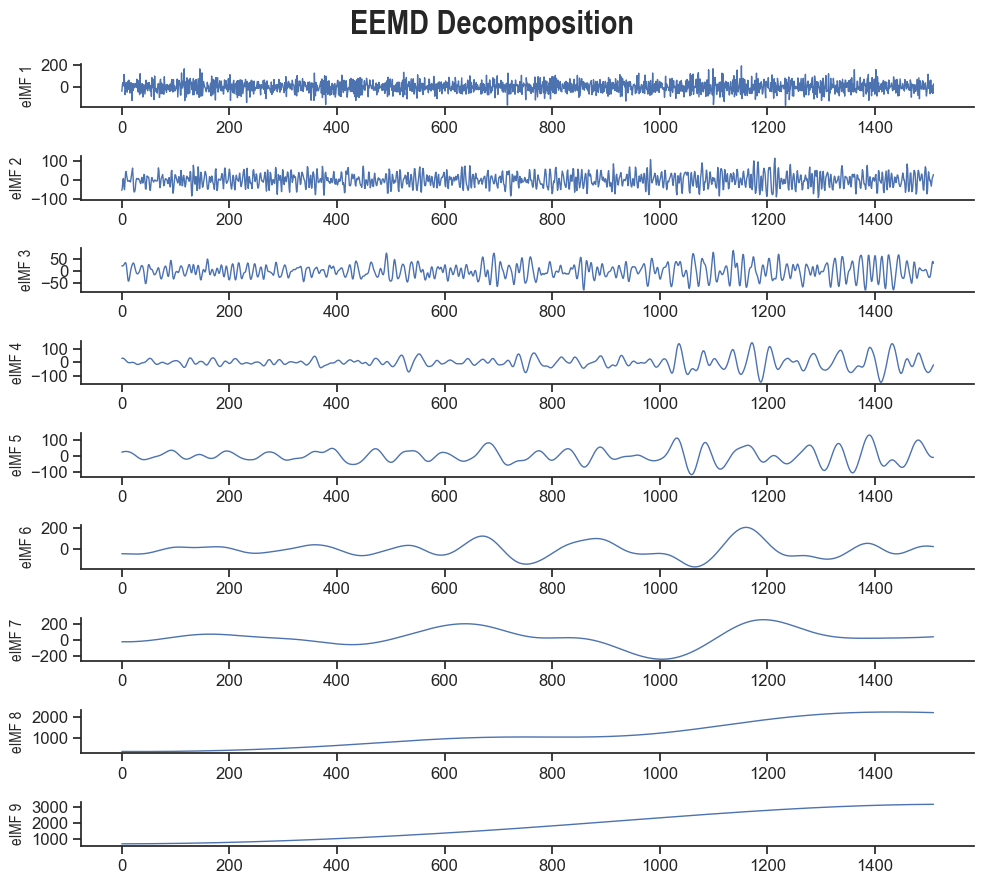

In [24]:
sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(10, 9))
# 设置刻度
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

#IMF的图像
for n in range(nIMFs):
    plt.subplot(nIMFs, 1, n + 1)
    sns.lineplot(data=eIMFs[n], linewidth=1, palette=sns.color_palette("Paired")[1])
    sns.despine()
    plt.ylabel("eIMF %i" % (n + 1), fontproperties = font_T_mini)
    plt.locator_params(axis="y", nbins=3) #调整坐标轴刻度
    plt.xticks(fontproperties = {'family':'Arial'})
    plt.yticks(fontproperties = {'family':'Arial'})
    plt.tight_layout()
plt.suptitle('EEMD Decomposition', fontproperties = font_T)
plt.tight_layout()
plt.savefig('EEMD_result.png', dpi=300, bbox_inches='tight')

# CEEMDAN分解

In [25]:
if __name__ == "__main__":
    cIMFs = CEEMDAN().ceemdan(S)
    nIMFs = cIMFs.shape[0]  # 子序列的数量

cIMFs_df = pd.DataFrame(cIMFs.T, columns=['imf'+str(i+1) for i in range(nIMFs)])
cIMFs_df.to_csv('CEEMDAN_result.csv', index=False)
cIMFs_df

,imf1,imf2,imf3,imf4,imf5,imf6,imf7
0,4.695081,4.530742,11.111715,40.146362,32.151136,-73.074648,638.159583
1,-1.643217,1.266479,9.161113,40.993158,32.359030,-73.427190,638.200600
2,0.871194,-5.010629,5.599925,41.469038,32.363131,-73.754333,638.251653
3,-0.037211,-8.657906,0.716585,41.563753,32.157972,-74.055962,638.312769
4,-0.977467,-6.826307,-5.112236,41.256434,31.747627,-74.332013,638.383978
...,...,...,...,...,...,...,...
1505,8.876208,7.496838,10.318492,-118.733870,93.620095,5.384126,3432.538110
1506,26.132225,7.017614,12.840366,-118.263762,93.450412,6.006346,3431.676905
1507,18.097439,0.181492,11.173495,-116.649236,93.260873,6.656834,3430.799123
1508,8.724217,-7.638697,6.813428,-113.949232,93.050186,7.335364,3429.904724


## 画图

C:\Users\Cooper\AppData\Local\Temp\ipykernel_26580\2103378048.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nIMFs, 1, n + 1)
C:\Users\Cooper\AppData\Local\Temp\ipykernel_26580\2103378048.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=cIMFs[n], linewidth=1, palette=sns.color_palette("Paired")[1])
C:\Users\Cooper\AppData\Local\Temp\ipykernel_26580\2103378048.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=cIMFs[n], linewidth=1, palette=sns.color_palette("Paired")[1])
C:\Users\Cooper\AppData\Local\Temp\ipykernel_26580\2103378048.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=cIMFs[n], linewidth=1, palette=sns.color_palette("Paired")[1])
C:\Users\Cooper\AppData\Local\Temp\ipykern

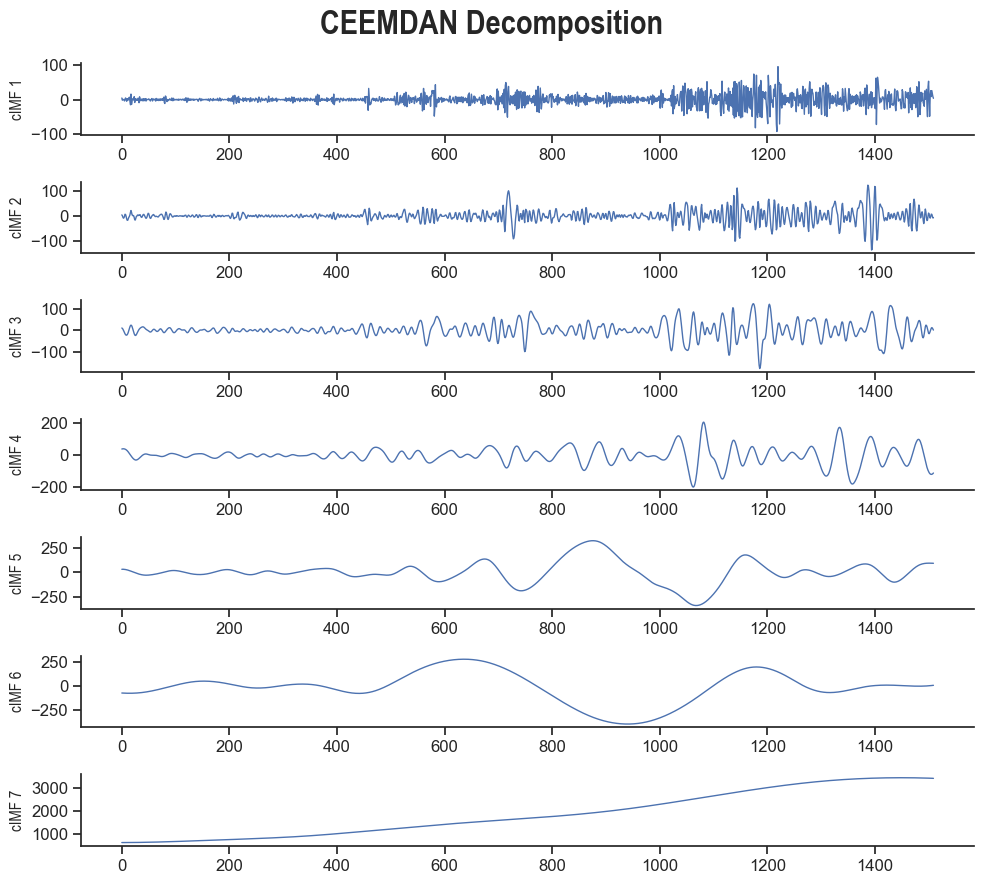

In [26]:
sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(10, 9))
# 设置刻度
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

#IMF的图像
for n in range(nIMFs):
    plt.subplot(nIMFs, 1, n + 1)
    sns.lineplot(data=cIMFs[n], linewidth=1, palette=sns.color_palette("Paired")[1])
    sns.despine()
    plt.ylabel("cIMF %i" % (n + 1), fontproperties = font_T_mini)
    plt.locator_params(axis="y", nbins=3) #调整坐标轴刻度
    plt.xticks(fontproperties = {'family':'Arial'})
    plt.yticks(fontproperties = {'family':'Arial'})
    plt.tight_layout()
plt.suptitle('CEEMDAN Decomposition', fontproperties = font_T)
plt.tight_layout()
plt.savefig('CEEMDAN_result.png', dpi=300, bbox_inches='tight')